## Leonardo Gracida Muñoz A01379812
Predicción del precio de un carro basándose en sus caraterísticas categóricas y variables numéricas.
<br>Primero importamos todas las librerías necesarias para poder resolver el problema.
<br> Enlace hacia la dataset utilizada:
<br>
https://www.kaggle.com/datasets/toramky/automobile-dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm

In [ ]:
#Importamos el la dataset a utilziar en este caso usamos la default de los automóviles
df = pd.read_csv("Automobile.csv")
print(df.shape)

(205, 26)


In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
#Vemos si hay valores faltantes de tipo vacio o NaN
df.isnull().mean()

symboling            0.0
normalized-losses    0.0
make                 0.0
fuel-type            0.0
aspiration           0.0
number-of-doors      0.0
body-style           0.0
drive-wheels         0.0
engine-location      0.0
wheel-base           0.0
length               0.0
width                0.0
height               0.0
curb-weight          0.0
engine-type          0.0
num-of-cylinders     0.0
engine-size          0.0
fuel-system          0.0
bore                 0.0
stroke               0.0
compression-ratio    0.0
horsepower           0.0
peak-rpm             0.0
city-mpg             0.0
highway-mpg          0.0
price                0.0
dtype: float64

# Llenado de datos vacios

En este caso vemos que en la base de datos no hay valores vacios tipos NaN, pero al revisar vemos que en lugar de valores vacios llenaron las características faltantes con un string de "?". Para poder lidiar con esto lo que hicimos fue el llenar los datos con este string con la media de las columnas numéricas, hicimos esto ya que vimos que el número de valores faltantes no es muy grande en comparación con el numéro total de cada columna numérica, en el caso de los valores faltantes de variables categóricas los llenamos con la moda de cada una de las columnas categóricas, ya que en este caso también el numpero de valores vacios no es grande en comparación con el numero de valores totales.

Como los valores faltantes son tipo string debemos iterar en cada una las columnas que detectemos valores "?" en lugar de usar las funciones automáticas de nan ya que técnicamente no lo son.

Como en el ejemplo de abajo donde iteramos en la primera columna para llenar estos valores faltanes con la media.

Checamos en las variables numéricas y categoricas si hay valores faltantes.

In [ ]:
columnas = ["bore","stroke","horsepower","price","number-of-doors"]
for i in columnas:
  print(df[i].value_counts())

3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.31     8
3.78     8
3.43     8
3.27     7
2.91     7
3.39     6
3.54     6
3.05     6
3.58     6
3.7      5
3.01     5
3.35     4
?        4
3.17     3
3.59     3
3.74     3
3.47     2
3.94     2
3.24     2
3.13     2
3.63     2
3.5      2
3.8      2
3.33     2
2.54     1
3.08     1
3.61     1
3.34     1
3.6      1
2.92     1
3.76     1
2.68     1
2.99     1
Name: bore, dtype: int64
3.4     20
3.23    14
3.15    14
3.03    14
3.39    13
2.64    11
3.29     9
3.35     9
3.46     8
3.11     6
3.27     6
3.41     6
3.07     6
3.58     6
3.19     6
3.5      6
3.64     5
3.52     5
3.86     4
3.54     4
3.47     4
?        4
3.9      3
2.9      3
3.1      2
4.17     2
2.8      2
2.19     2
3.08     2
2.68     2
2.36     1
3.16     1
2.07     1
3.21     1
3.12     1
2.76     1
2.87     1
Name: stroke, dtype: int64
68     19
70     11
69     10
116     9
110     8
95      7
88      6
62      6
101     6
160     6
114     6
84

Reemplazamos los signos de interrogación con valores vacios NaN.

In [ ]:
df = df.replace("?",np.nan)
df.dtypes
var_num = []

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,number-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Como debemos de separar el dataset en una parte de train y en una parte de test, antes vamos a llenar las variables categóricas faltantes con la moda y pasarlas a valores numéricos, esto lo hacemos porque al momento de dividir la data puede que una tenga variables categóricas que tenga el train que no tenga el test.
<br>Como en este caso solo una columna de categórica tiene datos vacios la llenamos con la moda.

In [ ]:
var = ["normalized-losses","bore","horsepower","peak-rpm","price","stroke"]
for i in var:
    df[i] = df[i].astype(float)
var_num = []
for i in df:
    if df[i].dtype != "object":
        var_num.append(i)

In [ ]:
df['number-of-doors'].fillna(df['number-of-doors'].mode()[0], inplace=True)

In [ ]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
number-of-doors       0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Llenamos las varibles categóricas que usen dummy variables.

In [ ]:
from sklearn.preprocessing import LabelEncoder
dummy_cat = ["make","body-style","drive-wheels","fuel-system","engine-type","num-of-cylinders"]
dummy_final = []
for i in dummy_cat:
    #print(df[i].unique())
    dummy_final+= df[i].unique().tolist()
    dummies = pd.get_dummies(df[i])
    df = pd.concat([df.drop(columns=[i]), dummies], axis=1)
print(dummy_final)

['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', 'convertible', 'hatchback', 'sedan', 'wagon', 'hardtop', 'rwd', 'fwd', '4wd', 'mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi', 'dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv', 'four', 'six', 'five', 'three', 'twelve', 'two', 'eight']


Ahora llenamos las variables categóricas que usen label encoder o que solo tengan dos categorías.

In [ ]:
label_encoder = LabelEncoder()
le_cat = ["fuel-type","aspiration","number-of-doors","engine-location"]
for i in le_cat:
    df[i]=label_encoder.fit_transform(df[i]) 
print(len(df.columns))

72


Ahora si separamos la data en train y test. usando un 30% de test.

---



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(["price"],axis=1), df["price"], test_size=0.30, random_state=42)
df = X_train
df["price"] = y_train
df_test = X_test
df_test["price"] = y_test
print(df.shape,df_test.shape)

(143, 72) (62, 72)


Llenamos lo datos numericos faltantes en la parte de train

In [ ]:
var = ["normalized-losses","bore","horsepower","peak-rpm","price","stroke"]
for i in var:
    df[i] = df[i].astype(float)
    mean = df[i].mean()
    df[i] = df[i].fillna(mean)

In [ ]:
df.isna().sum()

symboling            0
normalized-losses    0
fuel-type            0
aspiration           0
number-of-doors      0
                    ..
six                  0
three                0
twelve               0
two                  0
price                0
Length: 72, dtype: int64

In [ ]:
df.head()
df2 = df.copy()

# Llenado de datos vacios en la parte de test

In [ ]:
df_test.isna().sum()

symboling             0
normalized-losses    11
fuel-type             0
aspiration            0
number-of-doors       0
                     ..
six                   0
three                 0
twelve                0
two                   0
price                 2
Length: 72, dtype: int64

In [ ]:
columnas = ["normalized-losses","bore","horsepower","peak-rpm","price","stroke"]
for i in columnas:
    df_test[i] = df_test[i].astype(float)
    mean = df_test[i].mean()
    df_test[i] = df_test[i].fillna(mean)

In [ ]:
df_test.isna().sum()

symboling            0
normalized-losses    0
fuel-type            0
aspiration           0
number-of-doors      0
                    ..
six                  0
three                0
twelve               0
two                  0
price                0
Length: 72, dtype: int64

Al ver la descripción de las columnas numéricas vamos a escoger las variables que se pueden comportar de una forma más normal, viendo la desviación estándar y los cuartiles.
<br> En este caso vamos a sacar el boxplot, el histograma y el qqplot para ver su distribución.

## Length

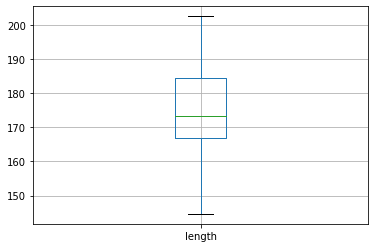

In [ ]:
df[["length"]].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6dafc0650>]],
      dtype=object)

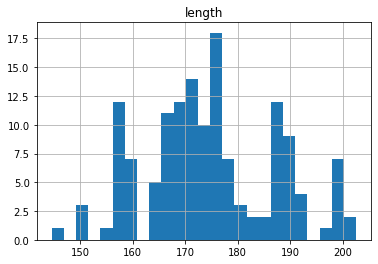

In [ ]:
df[["length"]].hist(bins=25)

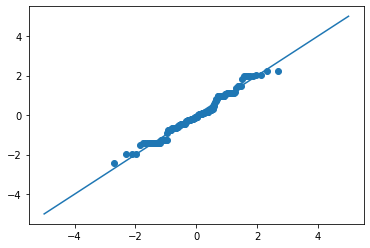

In [ ]:
data_normal = df["length"]
data_standard = (data_normal-data_normal.mean())/data_normal.std(ddof=1)
data_standard = np.sort(data_standard)
i= np.array(range(1,len(df["length"])+1))
P = (i-0.5)/len(data_normal)
theo_q=norm.ppf(P)
x = np.linspace(-5,5,50)
plt.plot(x,x)
plt.scatter(theo_q,data_standard)
plt.show()

## Width

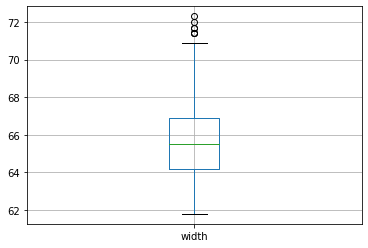

In [ ]:
df[["width"]].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6dab0a390>]],
      dtype=object)

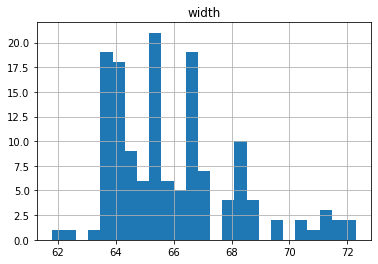

In [ ]:
df[["width"]].hist(bins=25)

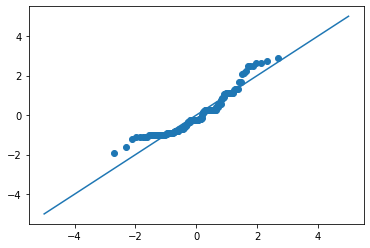

In [ ]:
data_normal = df["width"]
data_standard = (data_normal-data_normal.mean())/data_normal.std(ddof=1)
data_standard = np.sort(data_standard)
i= np.array(range(1,len(df["width"])+1))
P = (i-0.5)/len(data_normal)
theo_q=norm.ppf(P)
x = np.linspace(-5,5,50)
plt.plot(x,x)
plt.scatter(theo_q,data_standard)
plt.show()

## Height

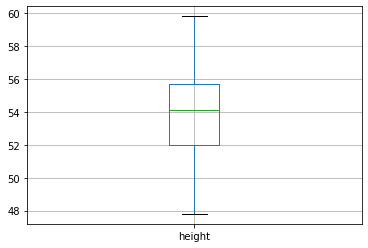

In [ ]:
df[["height"]].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6da526510>]],
      dtype=object)

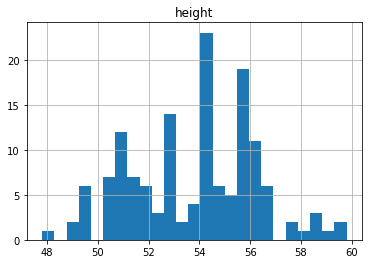

In [ ]:
df[["height"]].hist(bins=25)

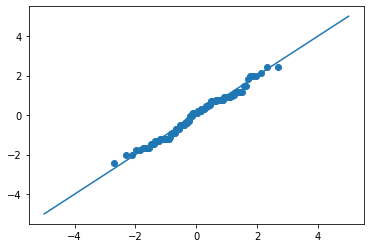

In [ ]:
data_normal = df["height"]
data_standard = (data_normal-data_normal.mean())/data_normal.std(ddof=1)
data_standard = np.sort(data_standard)
i= np.array(range(1,len(df["height"])+1))
P = (i-0.5)/len(data_normal)
theo_q=norm.ppf(P)
x = np.linspace(-5,5,50)
plt.plot(x,x)
plt.scatter(theo_q,data_standard)
plt.show()

## Curb weight

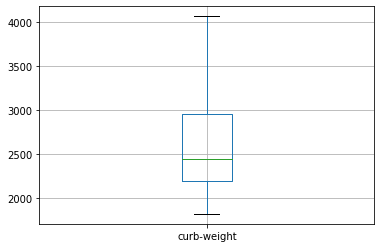

In [ ]:
df[["curb-weight"]].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6db02da90>]],
      dtype=object)

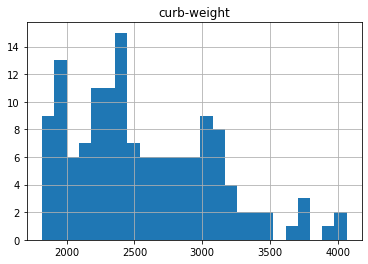

In [ ]:
df[["curb-weight"]].hist(bins=25)

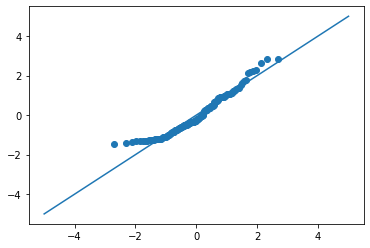

In [ ]:
data_normal = df["curb-weight"]
data_standard = (data_normal-data_normal.mean())/data_normal.std(ddof=1)
data_standard = np.sort(data_standard)
i= np.array(range(1,len(df["curb-weight"])+1))
P = (i-0.5)/len(data_normal)
theo_q=norm.ppf(P)
x = np.linspace(-5,5,50)
plt.plot(x,x)
plt.scatter(theo_q,data_standard)
plt.show()

## Engine size

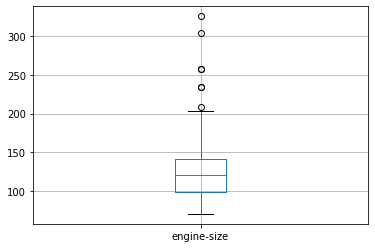

In [ ]:
df[["engine-size"]].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6dae81690>]],
      dtype=object)

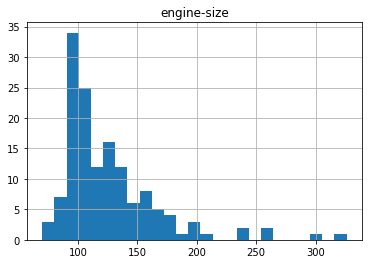

In [ ]:
df[["engine-size"]].hist(bins=25)

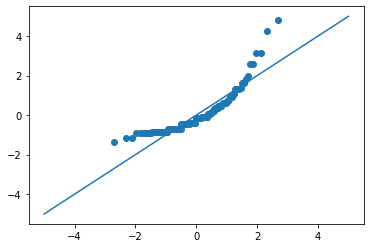

In [ ]:
data_normal = df["engine-size"]
data_standard = (data_normal-data_normal.mean())/data_normal.std(ddof=1)
data_standard = np.sort(data_standard)
i= np.array(range(1,len(df["engine-size"])+1))
P = (i-0.5)/len(data_normal)
theo_q=norm.ppf(P)
x = np.linspace(-5,5,50)
plt.plot(x,x)
plt.scatter(theo_q,data_standard)
plt.show()

## Bore

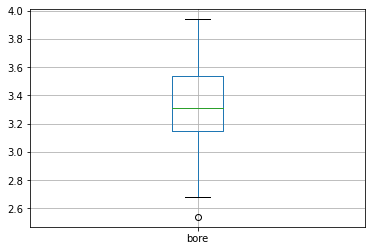

In [ ]:
df[["bore"]].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6db0dd890>]],
      dtype=object)

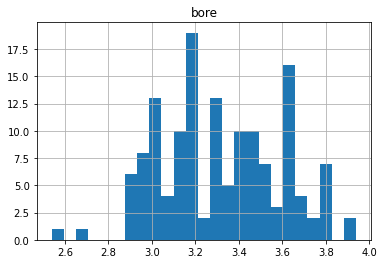

In [ ]:
df[["bore"]].hist(bins=25)

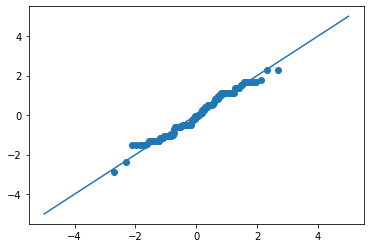

In [ ]:
data_normal = df["bore"]
data_standard = (data_normal-data_normal.mean())/data_normal.std(ddof=1)
data_standard = np.sort(data_standard)
i= np.array(range(1,len(df["bore"])+1))
P = (i-0.5)/len(data_normal)
theo_q=norm.ppf(P)
x = np.linspace(-5,5,50)
plt.plot(x,x)
plt.scatter(theo_q,data_standard)
plt.show()

## Horsepower

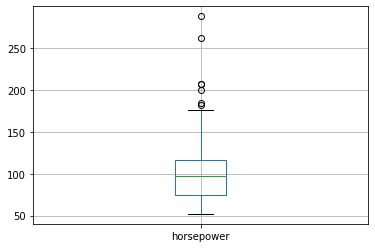

In [ ]:
df[["horsepower"]].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6dcbfbb50>]],
      dtype=object)

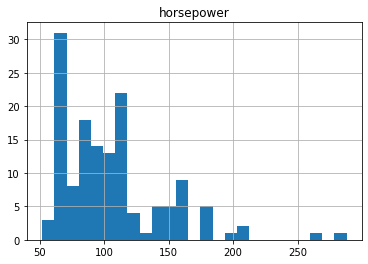

In [ ]:
df[["horsepower"]].hist(bins=25)

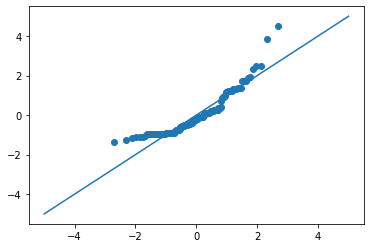

In [ ]:
data_normal = df["horsepower"]
data_standard = (data_normal-data_normal.mean())/data_normal.std(ddof=1)
data_standard = np.sort(data_standard)
i= np.array(range(1,len(df["horsepower"])+1))
P = (i-0.5)/len(data_normal)
theo_q=norm.ppf(P)
x = np.linspace(-5,5,50)
plt.plot(x,x)
plt.scatter(theo_q,data_standard)
plt.show()

## Price

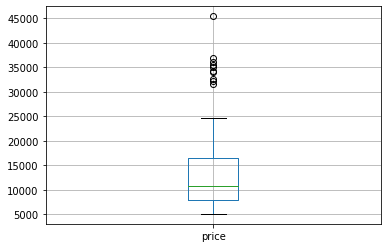

In [ ]:
df[["price"]].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6dca8f590>]],
      dtype=object)

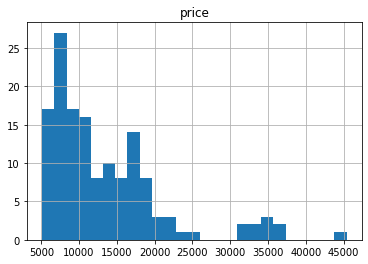

In [ ]:
df[["price"]].hist(bins=25)

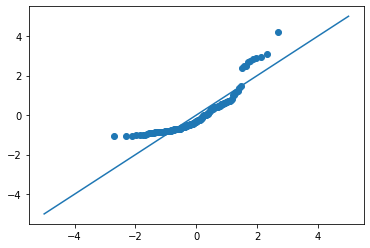

In [ ]:
data_normal = df["price"]
data_standard = (data_normal-data_normal.mean())/data_normal.std(ddof=1)
data_standard = np.sort(data_standard)
i= np.array(range(1,len(df["price"])+1))
P = (i-0.5)/len(data_normal)
theo_q=norm.ppf(P)
x = np.linspace(-5,5,50)
plt.plot(x,x)
plt.scatter(theo_q,data_standard)
plt.show()

Al ver su distribuciń, box plot y escala de los valores podemos observar lo siguiente. En el caso de los outliers consideré no eliminarlos, ya que en este caso los valores que son outliers o considerados asi no estan tan alejados que los demás o en caso de estar muy alejados hay más valores que los acompañan en lugar de parecer datos aislados como con son los outliers, ya que también la naturaleza de los carros puede haber carros con ciertos caballos de fuerza y puede haber otro carro con el doble o hasta el triple de caballos de fuerza. También en el caso del precio puede haber carros con un precio muy baratos como puede haber carros con precios muy grandes comparados con los carros más comúnes.

In [ ]:
print(df.shape)
df = df.drop_duplicates()

(143, 72)


Al ver estos datos debemos ver la correlación de estas variables numéricas con el target que es el precio del carro.

In [ ]:
df[var_num].corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.413611,-0.529310,-0.347552,-0.204471,-0.500465,-0.217571,-0.084859,-0.106126,-0.088887,-0.169990,0.065830,0.253015,-0.061686,0.027517,-0.044708
normalized-losses,0.413611,1.000000,-0.011070,0.069431,0.116593,-0.332565,0.135657,0.150737,0.029379,0.029061,-0.122458,0.217720,0.189112,-0.290022,-0.238526,0.193601
wheel-base,-0.529310,-0.011070,1.000000,0.873137,0.770678,0.587438,0.763689,0.513343,0.457995,0.177542,0.246137,0.313684,-0.366279,-0.450056,-0.541073,0.560112
length,-0.347552,0.069431,0.873137,1.000000,0.821267,0.471636,0.868949,0.643460,0.570529,0.125178,0.171994,0.514096,-0.329240,-0.652630,-0.692163,0.679567
width,-0.204471,0.116593,0.770678,0.821267,1.000000,0.252645,0.838544,0.710388,0.530939,0.159338,0.160541,0.627527,-0.219965,-0.634135,-0.664386,0.734369
height,-0.500465,-0.332565,0.587438,0.471636,0.252645,1.000000,0.261443,-0.013444,0.148536,-0.011468,0.241545,-0.144135,-0.284122,-0.034521,-0.106532,0.080209
curb-weight,-0.217571,0.135657,0.763689,0.868949,0.838544,0.261443,1.000000,0.841292,0.623010,0.140310,0.128556,0.733061,-0.297677,-0.771963,-0.818683,0.825527
engine-size,-0.084859,0.150737,0.513343,0.643460,0.710388,-0.013444,0.841292,1.000000,0.553638,0.162425,0.003910,0.800845,-0.265059,-0.680272,-0.701740,0.860621
bore,-0.106126,0.029379,0.457995,0.570529,0.530939,0.148536,0.623010,0.553638,1.000000,-0.049706,0.003866,0.555528,-0.265069,-0.558013,-0.554029,0.512338
stroke,-0.088887,0.029061,0.177542,0.125178,0.159338,-0.011468,0.140310,0.162425,-0.049706,1.000000,0.134473,0.037381,-0.029316,-0.042059,-0.050301,0.046216


Para poder tener un mejor análisis usamos un heat map para ver la columna o fila de la correlación del precio con las demás variables.

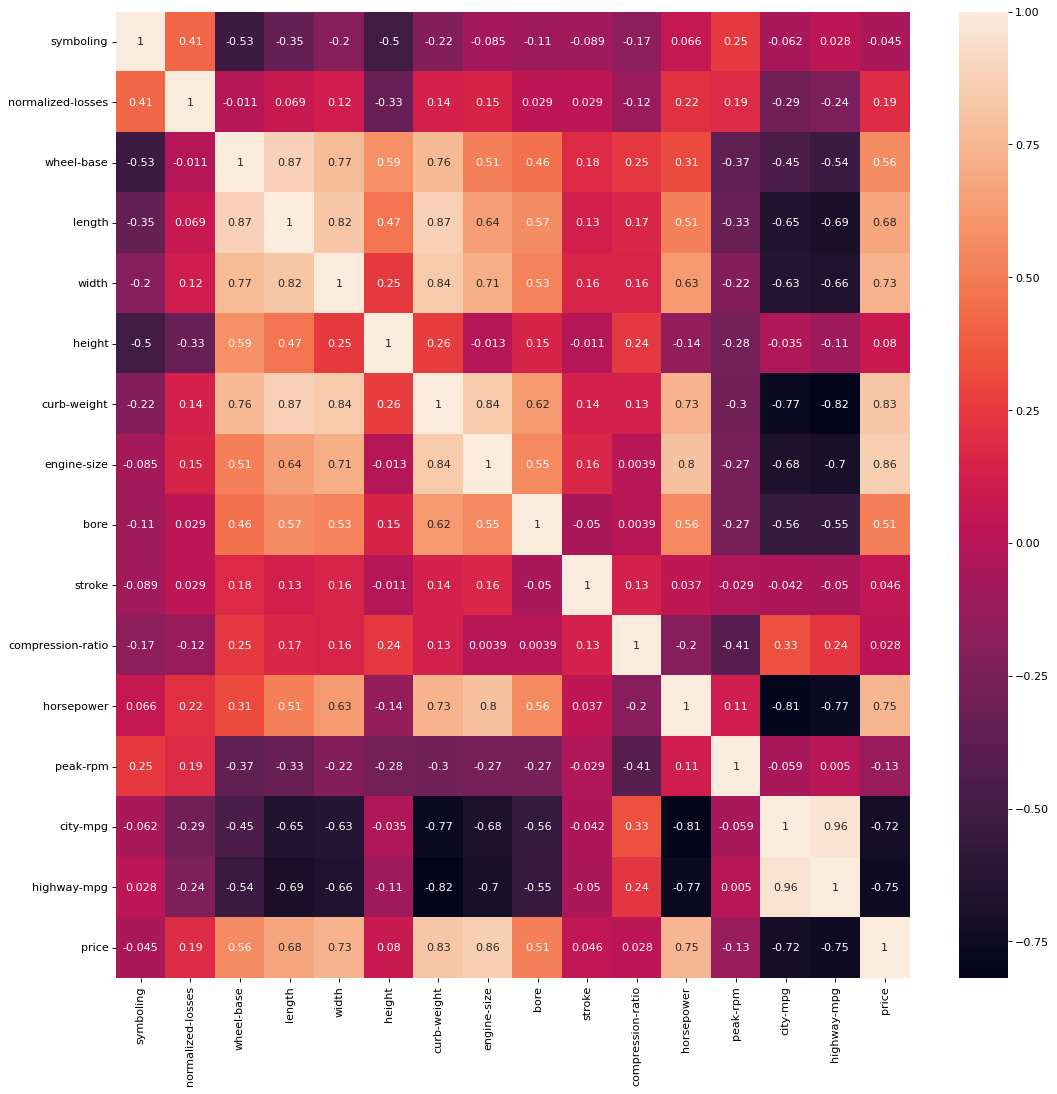

In [ ]:
plt.figure(figsize=(16, 16), dpi=80)
sns.heatmap(df[var_num].corr(),annot=True)
plt.show()

# Transformacion de los datos

Como pudimos ver en las gráficas la distribución de los datos no se comporta de una menra normal, por lo que necesitamos transformar los datos para que pudan comprtarce de una manera más normal, esto no va a hacer que se comporten de una menra ideal, pero va a mejorar el resultado. Además como hay datos con valores muy grandes lo qu debemos hacer es escalar las variables para poder hacer la transformación de los datos.
<br>Vamos a usar la transformación de yeo jhonson.
<br>En el caso del escalamiento vamos a usar la de mínimo y máximo, para que vaya de 0 a 1. Viendo el mapa de calor las variables que vamos a escoger para nuestro modelo es horsepower, engine-size y curb-weight

Además de no olvidar escalar y transforma el target

In [ ]:
df['minmax_price'] = (df['price']-df['price'].min())/ (df['price'].max()-df['price'].min())

In [ ]:
from scipy import stats
transformed, lbda = stats.yeojohnson(df['minmax_price'])
df['t_minmax_price'] = transformed
lbda

-3.937190628051185

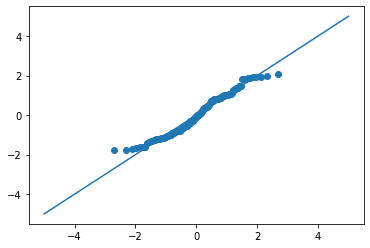

In [ ]:
data_normal = df["t_minmax_price"]
data_standard = (data_normal-data_normal.mean())/data_normal.std(ddof=1)
data_standard = np.sort(data_standard)
i= np.array(range(1,len(df["t_minmax_price"])+1))
P = (i-0.5)/len(data_normal)
theo_q=norm.ppf(P)
x = np.linspace(-5,5,50)
plt.plot(x,x)
plt.scatter(theo_q,data_standard)
plt.show()

Vemos que mejoro la distribución del precio haciendolo más normal.
<br> Lo hacemos con las siguientes variables escogidas.
## Curb weight

In [ ]:
df['minmax_curb_weight'] = (df['curb-weight']-df['curb-weight'].min())/ (df['curb-weight'].max()-df['curb-weight'].min())

In [ ]:
transformed, lbda = stats.yeojohnson(df['minmax_curb_weight'])
df['t_minmax_curb_weight'] = transformed
lbda

-1.086159711314654

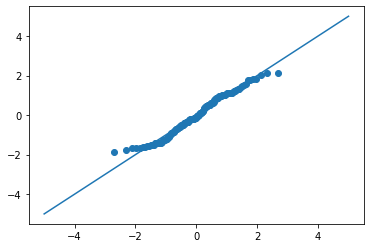

In [ ]:
data_normal = df["t_minmax_curb_weight"]
data_standard = (data_normal-data_normal.mean())/data_normal.std(ddof=1)
data_standard = np.sort(data_standard)
i= np.array(range(1,len(df["t_minmax_curb_weight"])+1))
P = (i-0.5)/len(data_normal)
theo_q=norm.ppf(P)
x = np.linspace(-5,5,50)
plt.plot(x,x)
plt.scatter(theo_q,data_standard)
plt.show()

## Engine size

In [ ]:
df['minmax_engine-size'] = (df['engine-size']-df['engine-size'].min())/ (df['engine-size'].max()-df['engine-size'].min())

In [ ]:
transformed, lbda = stats.yeojohnson(df['minmax_engine-size'])
df['t_minmax_engine-size'] = transformed
lbda

-4.502338134046304

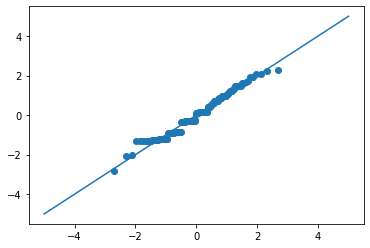

In [ ]:
data_normal = df["t_minmax_engine-size"]
data_standard = (data_normal-data_normal.mean())/data_normal.std(ddof=1)
data_standard = np.sort(data_standard)
i= np.array(range(1,len(df["t_minmax_engine-size"])+1))
P = (i-0.5)/len(data_normal)
theo_q=norm.ppf(P)
x = np.linspace(-5,5,50)
plt.plot(x,x)
plt.scatter(theo_q,data_standard)
plt.show()

## Horsepower

In [ ]:
df['minmax_horsepower'] = (df['horsepower']-df['horsepower'].min())/ (df['horsepower'].max()-df['horsepower'].min())

In [ ]:
transformed, lbda = stats.yeojohnson(df['minmax_horsepower'])
df['t_minmax_horsepower'] = transformed
lbda

-3.442913198187792

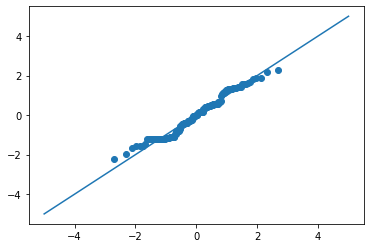

In [ ]:
data_normal = df["t_minmax_horsepower"]
data_standard = (data_normal-data_normal.mean())/data_normal.std(ddof=1)
data_standard = np.sort(data_standard)
i= np.array(range(1,len(df["t_minmax_horsepower"])+1))
P = (i-0.5)/len(data_normal)
theo_q=norm.ppf(P)
x = np.linspace(-5,5,50)
plt.plot(x,x)
plt.scatter(theo_q,data_standard)
plt.show()

# Analisis de variables categoricas
En este caso como yo no cuento con los conocimientos necesarios de las características categóricas de los carros, como lo es la marca, su tipo de transmisión, el número de puertas, el tipo de gasolina que usa, etc. Decidimos el ingresar o usar todas las variables categóricas de la Dataset.
<br> Para pasar las variables categóricas a valores numéricos hicimos lo sigiente: en caso de solo tener dos categorías usamos LabelEncoder, en caso de tener más de dos usamos Dummy Variables.
<br> Vemos que variables tiene más de dos categorías.

In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'number-of-doors', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', 'convertible',
       'hardtop', 'hatchback', 'sedan', 'wagon', '4wd', 'fwd', 'rwd', '1bbl',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'dohc', 'dohcv',
       'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'eight', 'five', 'four', 'six',
       'three', 'twelve', 'two', 'price', 'minmax_price', 't_minmax_price',
       'minmax_curb_weight', 't_minmax_curb_weight', 'minmax_engine-size',
       't_minmax_engine-size', 'minmax_horsepo

In [ ]:
df.head()

,symboling,normalized-losses,fuel-type,aspiration,number-of-doors,engine-location,wheel-base,length,width,height,...,two,price,minmax_price,t_minmax_price,minmax_curb_weight,t_minmax_curb_weight,minmax_engine-size,t_minmax_engine-size,minmax_horsepower,t_minmax_horsepower
177,-1,65.000000,1,0,0,0,102.4,175.6,66.5,53.9,...,0,11248.0,0.152177,0.108576,0.284379,0.219142,0.203125,0.125507,0.169492,0.121031
75,1,123.026549,1,1,1,0,102.7,178.4,68.0,54.8,...,0,16503.0,0.282632,0.158666,0.485536,0.321693,0.273438,0.147304,0.521186,0.221929
174,-1,65.000000,0,1,0,0,102.4,175.6,66.5,54.9,...,0,10698.0,0.138523,0.101588,0.294170,0.224905,0.156250,0.106580,0.088983,0.073874
31,2,137.000000,1,0,1,0,86.6,144.6,63.9,50.8,...,0,6855.0,0.043121,0.038895,0.000000,-0.000000,0.085938,0.068872,0.101695,0.082357
12,0,188.000000,1,0,1,0,101.2,176.8,64.8,54.3,...,0,20970.0,0.393526,0.185217,0.396529,0.280116,0.367188,0.167780,0.292373,0.170343


Cambiamos las columnas numéricas a las variables escaladas y transformadas.

In [ ]:
df2["price"] = df["minmax_price"]
df2["curb-weight"] = df["minmax_curb_weight"]
df2["engine-size"] = df["minmax_engine-size"]
df2["horsepower"] = df["minmax_horsepower"]

In [ ]:
df2.head()

,symboling,normalized-losses,fuel-type,aspiration,number-of-doors,engine-location,wheel-base,length,width,height,...,ohcv,rotor,eight,five,four,six,three,twelve,two,price
177,-1,65.000000,1,0,0,0,102.4,175.6,66.5,53.9,...,0,0,0,0,1,0,0,0,0,0.152177
75,1,123.026549,1,1,1,0,102.7,178.4,68.0,54.8,...,0,0,0,0,1,0,0,0,0,0.282632
174,-1,65.000000,0,1,0,0,102.4,175.6,66.5,54.9,...,0,0,0,0,1,0,0,0,0,0.138523
31,2,137.000000,1,0,1,0,86.6,144.6,63.9,50.8,...,0,0,0,0,1,0,0,0,0,0.043121
12,0,188.000000,1,0,1,0,101.2,176.8,64.8,54.3,...,0,0,0,0,0,1,0,0,0,0.393526


Ingresamos las variables Dummy

Ingresamos las variables con el Label Encoder

In [ ]:
df2["price"].head()

177    0.152177
75     0.282632
174    0.138523
31     0.043121
12     0.393526
Name: price, dtype: float64

In [ ]:
print(len(df2.columns))

72


Como vamos a usar Stats models, debemos adecuar el nombre de las columnas cambiando los guiones por guionas bajos, y los numeros por letras.

In [ ]:
import statsmodels.formula.api as smf
nombres = []
for i in df2:
    j = i.replace("-","_")
    nombres.append(j)
nombres_ac = []
for i in nombres:
    nombres_ac.append(i.replace("4","c").replace("2","d").replace("1","u"))
df2.columns = nombres_ac
numerical = ["engine-size","horsepower"]
cat = numerical + dummy_final + le_cat
categorias = " + ".join(cat).replace("-","_").replace("4","c").replace("2","d").replace("1","u")
#Al final creando un string con las variables numéricas escogidas e ingresando todas las variables categóricas.
print(categorias)

engine_size + horsepower + alfa_romero + audi + bmw + chevrolet + dodge + honda + isuzu + jaguar + mazda + mercedes_benz + mercury + mitsubishi + nissan + peugot + plymouth + porsche + renault + saab + subaru + toyota + volkswagen + volvo + convertible + hatchback + sedan + wagon + hardtop + rwd + fwd + cwd + mpfi + dbbl + mfi + ubbl + spfi + cbbl + idi + spdi + dohc + ohcv + ohc + l + rotor + ohcf + dohcv + four + six + five + three + twelve + two + eight + fuel_type + aspiration + number_of_doors + engine_location


En este caso vamos a utilizar un modelo de regresión lineal, el de mínimos cuadrados ordinarios, ya que como el el comportamiento del target que es el precio de los carros aumenta o baja dependiendo de las características del carro, considero que un modelo lineal es el correcto, ya que es una variable continua, no categórica.

Las variables que vamos a escoger son las de horse power y engine size esto porque tiene correlacione grandes pero diferetes, ya que la curb weight tiene una correalción muy parecida con engine size. Y escogemos todas las categóricas.

In [ ]:
#Creamos y entrenamos el modelo
reg = smf.ols('price ~ '+categorias , data=df2)
# print(dir(reg))
res = reg.fit()
# print(dir(res))

print(len(res.params))

59


In [ ]:
print(len(cat))

58


In [ ]:
for i in df2:
    print(i)

symboling
normalized_losses
fuel_type
aspiration
number_of_doors
engine_location
wheel_base
length
width
height
curb_weight
engine_size
bore
stroke
compression_ratio
horsepower
peak_rpm
city_mpg
highway_mpg
alfa_romero
audi
bmw
chevrolet
dodge
honda
isuzu
jaguar
mazda
mercedes_benz
mercury
mitsubishi
nissan
peugot
plymouth
porsche
renault
saab
subaru
toyota
volkswagen
volvo
convertible
hardtop
hatchback
sedan
wagon
cwd
fwd
rwd
ubbl
dbbl
cbbl
idi
mfi
mpfi
spdi
spfi
dohc
dohcv
l
ohc
ohcf
ohcv
rotor
eight
five
four
six
three
twelve
two
price


In [ ]:
len(list(categorias.split(" + ")))

58

Además de obtener una correlación aceptable o R, lo que debemos de analizar es si el coeficiente tiene el mismo signo con la correlación de las variables numéricas con el precio, en este caso vemos que si se cumple para horsepower y engine-size, eliminamos curb-weight ya que al hacer el modelo solo con las variables numéricas su coefiente es negativo y su correlación es positiva. En el caso de las variables categóricas no pude saber bien si su coefiente es correcto, pero considere que estas caracterísiticas son importantes, ya que cosas como la marca pueden subir o bajar el precio. Ya que no cuento con los conocimeintos necesarios de autos para considerar eliminar alguna.

In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     49.83
Date:                Wed, 07 Sep 2022   Prob (F-statistic):           3.58e-50
Time:                        20:45:15   Log-Likelihood:                 264.42
No. Observations:                 143   AIC:                            -434.8
Df Residuals:                      96   BIC:                            -295.6
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0066      0.020     

Como podemos ver las variables tiene un valor cercano a la real. Teniendo una correlación de 0.94 o R ajustada que es la pricipal cuando se tienen muchas variables.

In [ ]:
print(res.resid)

177    2.194610e-02
75     3.552714e-15
174    1.333108e-03
31    -4.224640e-03
12    -6.657530e-02
           ...     
106    8.285343e-02
14     1.542448e-02
92     6.772734e-03
179   -2.981447e-02
102   -4.105122e-02
Length: 143, dtype: float64


In [ ]:
print(res.fittedvalues)

177    0.130231
75     0.282632
174    0.137190
31     0.047346
12     0.460101
         ...   
106    0.246847
14     0.467347
92     0.036199
179    0.299910
102    0.271452
Length: 143, dtype: float64


In [ ]:
df2.head()

,symboling,normalized_losses,fuel_type,aspiration,number_of_doors,engine_location,wheel_base,length,width,height,...,ohcv,rotor,eight,five,four,six,three,twelve,two,price
177,-1,65.000000,1,0,0,0,102.4,175.6,66.5,53.9,...,0,0,0,0,1,0,0,0,0,0.152177
75,1,123.026549,1,1,1,0,102.7,178.4,68.0,54.8,...,0,0,0,0,1,0,0,0,0,0.282632
174,-1,65.000000,0,1,0,0,102.4,175.6,66.5,54.9,...,0,0,0,0,1,0,0,0,0,0.138523
31,2,137.000000,1,0,1,0,86.6,144.6,63.9,50.8,...,0,0,0,0,1,0,0,0,0,0.043121
12,0,188.000000,1,0,1,0,101.2,176.8,64.8,54.3,...,0,0,0,0,0,1,0,0,0,0.393526


# Testeo
Ahora vamos a probar el modelo generado en el cacho de test

In [ ]:
df_test.head()

,symboling,normalized-losses,fuel-type,aspiration,number-of-doors,engine-location,wheel-base,length,width,height,...,ohcv,rotor,eight,five,four,six,three,twelve,two,price
15,0,119.72549,1,0,0,0,103.5,189.0,66.9,55.7,...,0,0,0,0,0,1,0,0,0,30760.0
9,0,119.72549,1,1,1,0,99.5,178.2,67.9,52.0,...,0,0,0,1,0,0,0,0,0,12958.9
100,0,106.00000,1,0,0,0,97.2,173.4,65.2,54.7,...,0,0,0,0,1,0,0,0,0,9549.0
132,3,150.00000,1,0,1,0,99.1,186.6,66.5,56.1,...,0,0,0,0,1,0,0,0,0,11850.0
68,-1,93.00000,0,1,0,0,110.0,190.9,70.3,58.7,...,0,0,0,1,0,0,0,0,0,28248.0


In [ ]:
df_test.shape

(62, 72)

Eliminamos las variables numéricas que no utilizamos.

In [ ]:
df_test = df_test.drop(["normalized-losses","symboling","wheel-base","length","width","height","curb-weight","bore","stroke","compression-ratio","peak-rpm","city-mpg","highway-mpg"],axis=1)

In [ ]:
df_test.head()

,fuel-type,aspiration,number-of-doors,engine-location,engine-size,horsepower,alfa-romero,audi,bmw,chevrolet,...,ohcv,rotor,eight,five,four,six,three,twelve,two,price
15,1,0,0,0,209,182.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,30760.0
9,1,1,1,0,131,160.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,12958.9
100,1,0,0,0,120,97.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,9549.0
132,1,0,1,0,121,110.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,11850.0
68,0,1,0,0,183,123.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,28248.0


# Escalamiento

Escalamos las variables del test conforme a las de train.

In [ ]:
df_test['engine-size'] = (df_test['engine-size']-df['engine-size'].min())/ (df['engine-size'].max()-df['engine-size'].min())
df_test['horsepower'] = (df_test['horsepower']-df['horsepower'].min())/ (df['horsepower'].max()-df['horsepower'].min())
df_test['price'] = (df_test['price']-df['price'].min())/ (df['price'].max()-df['price'].min())
y = df_test["price"]

Eliminamos los string con numéros con letras.

In [ ]:
columnas = []
for i in df_test.columns:
    i = i.replace("-","_")
    i = i.replace("4","c")
    i = i.replace("2","d")
    i = i.replace("1","u")
    columnas.append(i)
df_test.columns = columnas
print(columnas)

['fuel_type', 'aspiration', 'number_of_doors', 'engine_location', 'engine_size', 'horsepower', 'alfa_romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercedes_benz', 'mercury', 'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', 'convertible', 'hardtop', 'hatchback', 'sedan', 'wagon', 'cwd', 'fwd', 'rwd', 'ubbl', 'dbbl', 'cbbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'eight', 'five', 'four', 'six', 'three', 'twelve', 'two', 'price']


In [ ]:
columnas = numerical + dummy_final + le_cat
col_final = []
for i in columnas:
    i = i.replace("-","_")
    i = i.replace("4","c")
    i = i.replace("2","d")
    i = i.replace("1","u")
    col_final.append(i)
print(len(df.columns),len(df_test.columns))

80 59


Acomodamos el test como entrenamos el modelo creado.

In [ ]:
df_test = df_test[col_final]
df_test.head()

,engine_size,horsepower,alfa_romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,...,six,five,three,twelve,two,eight,fuel_type,aspiration,number_of_doors,engine_location
15,0.542969,0.550847,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
9,0.238281,0.457627,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,1,0
100,0.195312,0.190678,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
132,0.199219,0.245763,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
68,0.441406,0.300847,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


# Desempeño:

Hacemos unas predicciones

In [ ]:
predicciones = res.predict(df_test).to_numpy()
print("Predicciones:")
print(predicciones)
print("Reales:")
print(y.to_numpy())

Predicciones:
[ 0.63001302  0.44579481  0.11433074  0.226506    0.65641084  0.02986417
  0.08044059  0.06488985  0.07175242  0.061673    0.25470042  0.02667071
  0.16682518  0.13023105  0.89026444  0.04432211 -0.04398458  0.22657898
  0.09701075  0.0727568   0.12107988  0.27245627  0.08413332  0.01897303
  0.01911919  0.62276698  0.21867467  0.28935681  0.03519493  0.29036119
  0.65741522  0.02627451  0.05907262  0.3561746   0.07307028  0.70534923
  0.14708318  0.21168264  0.12014897  0.22657898  0.05855904  0.10698824
  0.19304154  0.04240684  0.03619931  0.08971396  0.02003009  0.03904197
  0.29589687  0.25021668  0.02983486  0.2999103   0.03472453  0.12932015
  0.03519493  0.32593157  0.21867467  0.21168264  0.7132773   0.01480755
  0.07622919  0.24684718]
Reales:
[6.36562236e-01 1.94650216e-01 1.09999504e-01 1.67121791e-01
 5.74201877e-01 6.65557817e-02 6.62827069e-02 1.02775433e-01
 1.26110918e-01 6.59599821e-02 2.02993893e-01 7.74539497e-02
 3.26746438e-01 1.20897671e-01 8.897770

Ahorita tenemos las predicciones y los targets reales escalados, pero viendo las diferencias no son muchas tomando en cuenta en la escala en la que se encuentra.

Mostramos los residuos o restas entre estos:

In [ ]:
print("Residuos: ")
print(y.to_numpy() - predicciones)

Residuos: 
[ 0.00654922 -0.25114459 -0.00433124 -0.05938421 -0.08220897  0.03669161
 -0.01415789  0.03788558  0.0543585   0.00428699 -0.05170653  0.05078324
  0.15992126 -0.00933338 -0.00048737 -0.01031188  0.0448038  -0.04011853
 -0.02077323  0.04744577 -0.03724591 -0.06439808 -0.0064063   0.01481378
  0.01995533  0.27582296 -0.10644091 -0.08338392  0.03632584 -0.09618017
 -0.1501415   0.00130605  0.00994084  0.05013591 -0.00924524 -0.13293476
  0.00536705 -0.06702746  0.07450125  0.00605594 -0.00034445  0.22134699
  0.06667744  0.00227813  0.02290897  0.009015    0.00755047  0.00899438
 -0.00340891 -0.05543986 -0.00061585 -0.01591248  0.01445376 -0.03424046
  0.0201896  -0.07440483 -0.13598264 -0.04468497  0.07888793 -0.00807998
  0.02592561  0.05306345]


Ahora volvemos a la escala original para poder ver que tan diferentes son los precios realmente.

In [ ]:
pred = predicciones*(df['price'].max()-df['price'].min())+df['price'].min()
y = y.to_numpy()
y = y*(df['price'].max()-df['price'].min())+df['price'].min()

In [ ]:
print("Predicciones escala original: ")
print(np.round(pred))
print("Reales escala original: ")
print(y)

Predicciones escala original: 
[30496. 23076.  9723. 14242. 31560.  6321.  8358.  7732.  8008.  7602.
 15378.  6192. 11838. 10364. 40980.  6903.  3346. 14245.  9026.  8049.
  9995. 16093.  8507.  5882.  5888. 30204. 13927. 16774.  6536. 16814.
 31600.  6176.  7498. 19465.  8061. 33531. 11043. 13645.  9958. 14245.
  7477.  9428. 12894.  6826.  6576.  8732.  5925.  6691. 17037. 15197.
  6320. 17199.  6517. 10327.  6536. 18247. 13927. 13645. 33850.  5714.
  8189. 15061.]
Reales escala original: 
[30760.  12958.9  9549.  11850.  28248.   7799.   7788.   9258.  10198.
  7775.  13295.   8238.  18280.   9988.  40960.   6488.   5151.  12629.
  8189.   9960.   8495.  13499.   8249.   6479.   6692.  41315.   9639.
 13415.   7999.  12940.  25552.   6229.   7898.  21485.   7689.  28176.
 11259.  10945.  12958.9 14489.   7463.  18344.  15580.   6918.   7499.
  9095.   6229.   7053.  16900.  12964.   6295.  16558.   7099.   8948.
  7349.  15250.   8449.  11845.  37028.   5389.   9233.  17199. ]


In [ ]:
print("Residuos escala original: ")
print(np.round(y-pred))

Residuos escala original: 
[   264. -10117.   -174.  -2392.  -3312.   1478.   -570.   1526.   2190.
    173.  -2083.   2046.   6442.   -376.    -20.   -415.   1805.  -1616.
   -837.   1911.  -1500.  -2594.   -258.    597.    804.  11111.  -4288.
  -3359.   1463.  -3874.  -6048.     53.    400.   2020.   -372.  -5355.
    216.  -2700.   3001.    244.    -14.   8916.   2686.     92.    923.
    363.    304.    362.   -137.  -2233.    -25.   -641.    582.  -1379.
    813.  -2997.  -5478.  -1800.   3178.   -325.   1044.   2138.]


Como podemos ver la diferencia entre las predicciones y los target no es mucha, tomando en cuenta la cantidad de cada una de de las predicciones, entre más grande sea el precio el error puede aumentar, pero entre más peuqeño ese error no aumenta mucho.

In [ ]:
for i,j in zip(np.round(pred),np.round(y)):
    print("Real: ",j,", Pred: ",i,", Residuo: ", np.round(j-i))

Real:  30760.0 , Pred:  30496.0 , Residuo:  264.0
Real:  12959.0 , Pred:  23076.0 , Residuo:  -10117.0
Real:  9549.0 , Pred:  9723.0 , Residuo:  -174.0
Real:  11850.0 , Pred:  14242.0 , Residuo:  -2392.0
Real:  28248.0 , Pred:  31560.0 , Residuo:  -3312.0
Real:  7799.0 , Pred:  6321.0 , Residuo:  1478.0
Real:  7788.0 , Pred:  8358.0 , Residuo:  -570.0
Real:  9258.0 , Pred:  7732.0 , Residuo:  1526.0
Real:  10198.0 , Pred:  8008.0 , Residuo:  2190.0
Real:  7775.0 , Pred:  7602.0 , Residuo:  173.0
Real:  13295.0 , Pred:  15378.0 , Residuo:  -2083.0
Real:  8238.0 , Pred:  6192.0 , Residuo:  2046.0
Real:  18280.0 , Pred:  11838.0 , Residuo:  6442.0
Real:  9988.0 , Pred:  10364.0 , Residuo:  -376.0
Real:  40960.0 , Pred:  40980.0 , Residuo:  -20.0
Real:  6488.0 , Pred:  6903.0 , Residuo:  -415.0
Real:  5151.0 , Pred:  3346.0 , Residuo:  1805.0
Real:  12629.0 , Pred:  14245.0 , Residuo:  -1616.0
Real:  8189.0 , Pred:  9026.0 , Residuo:  -837.0
Real:  9960.0 , Pred:  8049.0 , Residuo:  1911.0

Obtenemos la correlacion del modelo y ver que tan preciso es

In [ ]:
import sklearn.metrics as sm
print("R2 score =", round(sm.r2_score(y, pred), 2))

R2 score = 0.86


Como podemos ver nuestro modelo tiene un desempeño aceptable, logrando acercarse de manera óptima a la correlación del modelo en la parte del train, no llegando al 90% pero si acercandose me manera óptima.
<br>Mostrando que nuestro modelo esta bien diseñado y no esta cerca de ser una respuesta al azar. 
<br>Esto se puede ver al observar las predicciones que hacemos anteiormente, ya que el residuo entre la predicción y la real no es mucho en comparación con la catidad total tanto de la real como la predicción. 